## importing geopandas library

In [1]:
import geopandas as gpd
from shapely import distance

## getting data

In [2]:
data = 'denmark_munc.geojson'

dk_cities = gpd.read_file(data)

dk_cities

,lau_1,label_en,label_dk,iso_3166_2,geometry
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999.00000, 9.460..."
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((10.06198 55.83301 -999.00000, 10.0..."
2,561,Esbjerg,Esbjerg,DK-83,"POLYGON Z ((8.59656 55.53506 -999.00000, 8.601..."
3,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((9.78314 57.07319 -999.00000, 9.781..."
4,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((9.19738 57.13868 -999.00000, 9.207..."
...,...,...,...,...,...
306,461,Odense,Odense,DK-83,"POLYGON Z ((10.25777 55.44339 -999.00000, 10.2..."
307,563,Fanø,Fanø,DK-83,"POLYGON Z ((8.42607 55.35239 -999.00000, 8.417..."
308,563,Fanø,Fanø,DK-83,"POLYGON Z ((8.47452 55.34461 -999.00000, 8.474..."
309,630,Vejle,Vejle,DK-83,"POLYGON Z ((9.11714 55.76669 -999.00000, 9.100..."


## getting crs from geojson data

CRS (Coordinate Reference System)

The coordinate reference system for all GeoJSON coordinates is a geographic coordinate reference system, using the World Geodetic System 1984 (WGS84) datum, with longitude and latitude units of decimal degrees.

In [3]:
dk_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Data transformation

The municipalities GeoDataFrame is associated with geographic coordinates (EPSG: 4326), but we want to transform it into projected coordinates, so we can make some calculations in meters. Let’s transform it to EPSG:25832, the standard projected CRS for Denmark. We can do it with the Geopandas.to_crs() method.

In [4]:
dk_cities.to_crs(epsg=25832, inplace=True)

dk_cities.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.01, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## assign area to new column

geoseries.area - returns a Series containing the area of each geometry in the GeoSeries expressed in the units of the CRS.

In [5]:
dk_cities['area'] = dk_cities.area

dk_cities

,lau_1,label_en,label_dk,iso_3166_2,geometry,area
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((528116.000 6190641.000 -999.000, 5...",5.482487e+08
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((566517.000 6188004.430 -999.000, 5...",3.276401e+06
2,561,Esbjerg,Esbjerg,DK-83,"POLYGON Z ((474537.000 6154409.000 -999.000, 4...",7.596189e+08
3,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((547480.000 6325805.000 -999.000, 5...",1.329880e+05
4,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((511946.000 6332841.000 -999.000, 5...",8.651801e+08
...,...,...,...,...,...,...
306,461,Odense,Odense,DK-83,"POLYGON Z ((579566.000 6144852.000 -999.000, 5...",3.060200e+08
307,563,Fanø,Fanø,DK-83,"POLYGON Z ((463609.000 6134156.000 -999.000, 4...",5.957714e+07
308,563,Fanø,Fanø,DK-83,"POLYGON Z ((466675.000 6133266.000 -999.000, 4...",1.461910e+05
309,630,Vejle,Vejle,DK-83,"POLYGON Z ((507350.000 6180119.000 -999.000, 5...",1.060296e+09


## assign centroid to new column

geoseries.centroid - Returns a GeoSeries of points representing the centroid of each geometry

In [6]:
dk_cities['centroid'] = dk_cities.centroid

dk_cities

,lau_1,label_en,label_dk,iso_3166_2,geometry,area,centroid
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((528116.000 6190641.000 -999.000, 5...",5.482487e+08,POINT (546447.772 6183340.124)
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((566517.000 6188004.430 -999.000, 5...",3.276401e+06,POINT (567632.832 6187271.285)
2,561,Esbjerg,Esbjerg,DK-83,"POLYGON Z ((474537.000 6154409.000 -999.000, 4...",7.596189e+08,POINT (480027.212 6141522.972)
3,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((547480.000 6325805.000 -999.000, 5...",1.329880e+05,POINT (547594.388 6326007.822)
4,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((511946.000 6332841.000 -999.000, 5...",8.651801e+08,POINT (530467.761 6333338.303)
...,...,...,...,...,...,...,...
306,461,Odense,Odense,DK-83,"POLYGON Z ((579566.000 6144852.000 -999.000, 5...",3.060200e+08,POINT (586922.362 6138497.936)
307,563,Fanø,Fanø,DK-83,"POLYGON Z ((463609.000 6134156.000 -999.000, 4...",5.957714e+07,POINT (462736.177 6140591.235)
308,563,Fanø,Fanø,DK-83,"POLYGON Z ((466675.000 6133266.000 -999.000, 4...",1.461910e+05,POINT (466897.856 6133593.565)
309,630,Vejle,Vejle,DK-83,"POLYGON Z ((507350.000 6180119.000 -999.000, 5...",1.060296e+09,POINT (522972.750 6177440.800)


## assign boundaries to new column

geoseries.boundary - returns geoseries of lower dimensional objects representing each geometry’s set-theoretic boundary.

In [7]:
dk_cities['boundary']=dk_cities.boundary

dk_cities

,lau_1,label_en,label_dk,iso_3166_2,geometry,area,centroid,boundary
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((528116.000 6190641.000 -999.000, 5...",5.482487e+08,POINT (546447.772 6183340.124),"LINESTRING Z (528116.000 6190641.000 -999.000,..."
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((566517.000 6188004.430 -999.000, 5...",3.276401e+06,POINT (567632.832 6187271.285),"LINESTRING Z (566517.000 6188004.430 -999.000,..."
2,561,Esbjerg,Esbjerg,DK-83,"POLYGON Z ((474537.000 6154409.000 -999.000, 4...",7.596189e+08,POINT (480027.212 6141522.972),"LINESTRING Z (474537.000 6154409.000 -999.000,..."
3,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((547480.000 6325805.000 -999.000, 5...",1.329880e+05,POINT (547594.388 6326007.822),"LINESTRING Z (547480.000 6325805.000 -999.000,..."
4,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((511946.000 6332841.000 -999.000, 5...",8.651801e+08,POINT (530467.761 6333338.303),"LINESTRING Z (511946.000 6332841.000 -999.000,..."
...,...,...,...,...,...,...,...,...
306,461,Odense,Odense,DK-83,"POLYGON Z ((579566.000 6144852.000 -999.000, 5...",3.060200e+08,POINT (586922.362 6138497.936),"LINESTRING Z (579566.000 6144852.000 -999.000,..."
307,563,Fanø,Fanø,DK-83,"POLYGON Z ((463609.000 6134156.000 -999.000, 4...",5.957714e+07,POINT (462736.177 6140591.235),"LINESTRING Z (463609.000 6134156.000 -999.000,..."
308,563,Fanø,Fanø,DK-83,"POLYGON Z ((466675.000 6133266.000 -999.000, 4...",1.461910e+05,POINT (466897.856 6133593.565),"LINESTRING Z (466675.000 6133266.000 -999.000,..."
309,630,Vejle,Vejle,DK-83,"POLYGON Z ((507350.000 6180119.000 -999.000, 5...",1.060296e+09,POINT (522972.750 6177440.800),"LINESTRING Z (507350.000 6180119.000 -999.000,..."


## Distance 

The distance method gives the minimum distance from a geometry to a location. Say we want to calculate the distance from the Odenese to the centroids of every municipalities, and then add the distances (in kilometers) in a new column. 

In [8]:
odenese = dk_cities.loc[dk_cities["label_en"] == 'Odense']

odenese

,lau_1,label_en,label_dk,iso_3166_2,geometry,area,centroid,boundary
306,461,Odense,Odense,DK-83,"POLYGON Z ((579566.000 6144852.000 -999.000, 5...",3.060200e+08,POINT (586922.362 6138497.936),"LINESTRING Z (579566.000 6144852.000 -999.000,..."


In [9]:
odenese.set_crs(epsg=4326, allow_override=True)

odenese = odenese.to_crs(epsg=25832)
dk_cities['odenese'] = [float(odenese.distance(centroid)) / 1000 for centroid in dk_cities.centroid]

In [10]:
dk_cities

,lau_1,label_en,label_dk,iso_3166_2,geometry,area,centroid,boundary,odenese
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((528116.000 6190641.000 -999.000, 5...",5.482487e+08,POINT (546447.772 6183340.124),"LINESTRING Z (528116.000 6190641.000 -999.000,...",49.868900
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((566517.000 6188004.430 -999.000, 5...",3.276401e+06,POINT (567632.832 6187271.285),"LINESTRING Z (566517.000 6188004.430 -999.000,...",41.259911
2,561,Esbjerg,Esbjerg,DK-83,"POLYGON Z ((474537.000 6154409.000 -999.000, 4...",7.596189e+08,POINT (480027.212 6141522.972),"LINESTRING Z (474537.000 6154409.000 -999.000,...",95.071200
3,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((547480.000 6325805.000 -999.000, 5...",1.329880e+05,POINT (547594.388 6326007.822),"LINESTRING Z (547480.000 6325805.000 -999.000,...",180.590419
4,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((511946.000 6332841.000 -999.000, 5...",8.651801e+08,POINT (530467.761 6333338.303),"LINESTRING Z (511946.000 6332841.000 -999.000,...",191.728483
...,...,...,...,...,...,...,...,...,...
306,461,Odense,Odense,DK-83,"POLYGON Z ((579566.000 6144852.000 -999.000, 5...",3.060200e+08,POINT (586922.362 6138497.936),"LINESTRING Z (579566.000 6144852.000 -999.000,...",0.000000
307,563,Fanø,Fanø,DK-83,"POLYGON Z ((463609.000 6134156.000 -999.000, 4...",5.957714e+07,POINT (462736.177 6140591.235),"LINESTRING Z (463609.000 6134156.000 -999.000,...",112.304424
308,563,Fanø,Fanø,DK-83,"POLYGON Z ((466675.000 6133266.000 -999.000, 4...",1.461910e+05,POINT (466897.856 6133593.565),"LINESTRING Z (466675.000 6133266.000 -999.000,...",108.108923
309,630,Vejle,Vejle,DK-83,"POLYGON Z ((507350.000 6180119.000 -999.000, 5...",1.060296e+09,POINT (522972.750 6177440.800),"LINESTRING Z (507350.000 6180119.000 -999.000,...",64.431437


## Plotting with GeoPandas

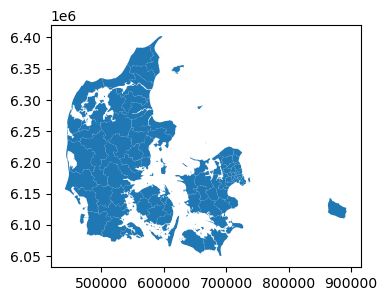

In [11]:
plot = dk_cities.plot(figsize=(4, 4))

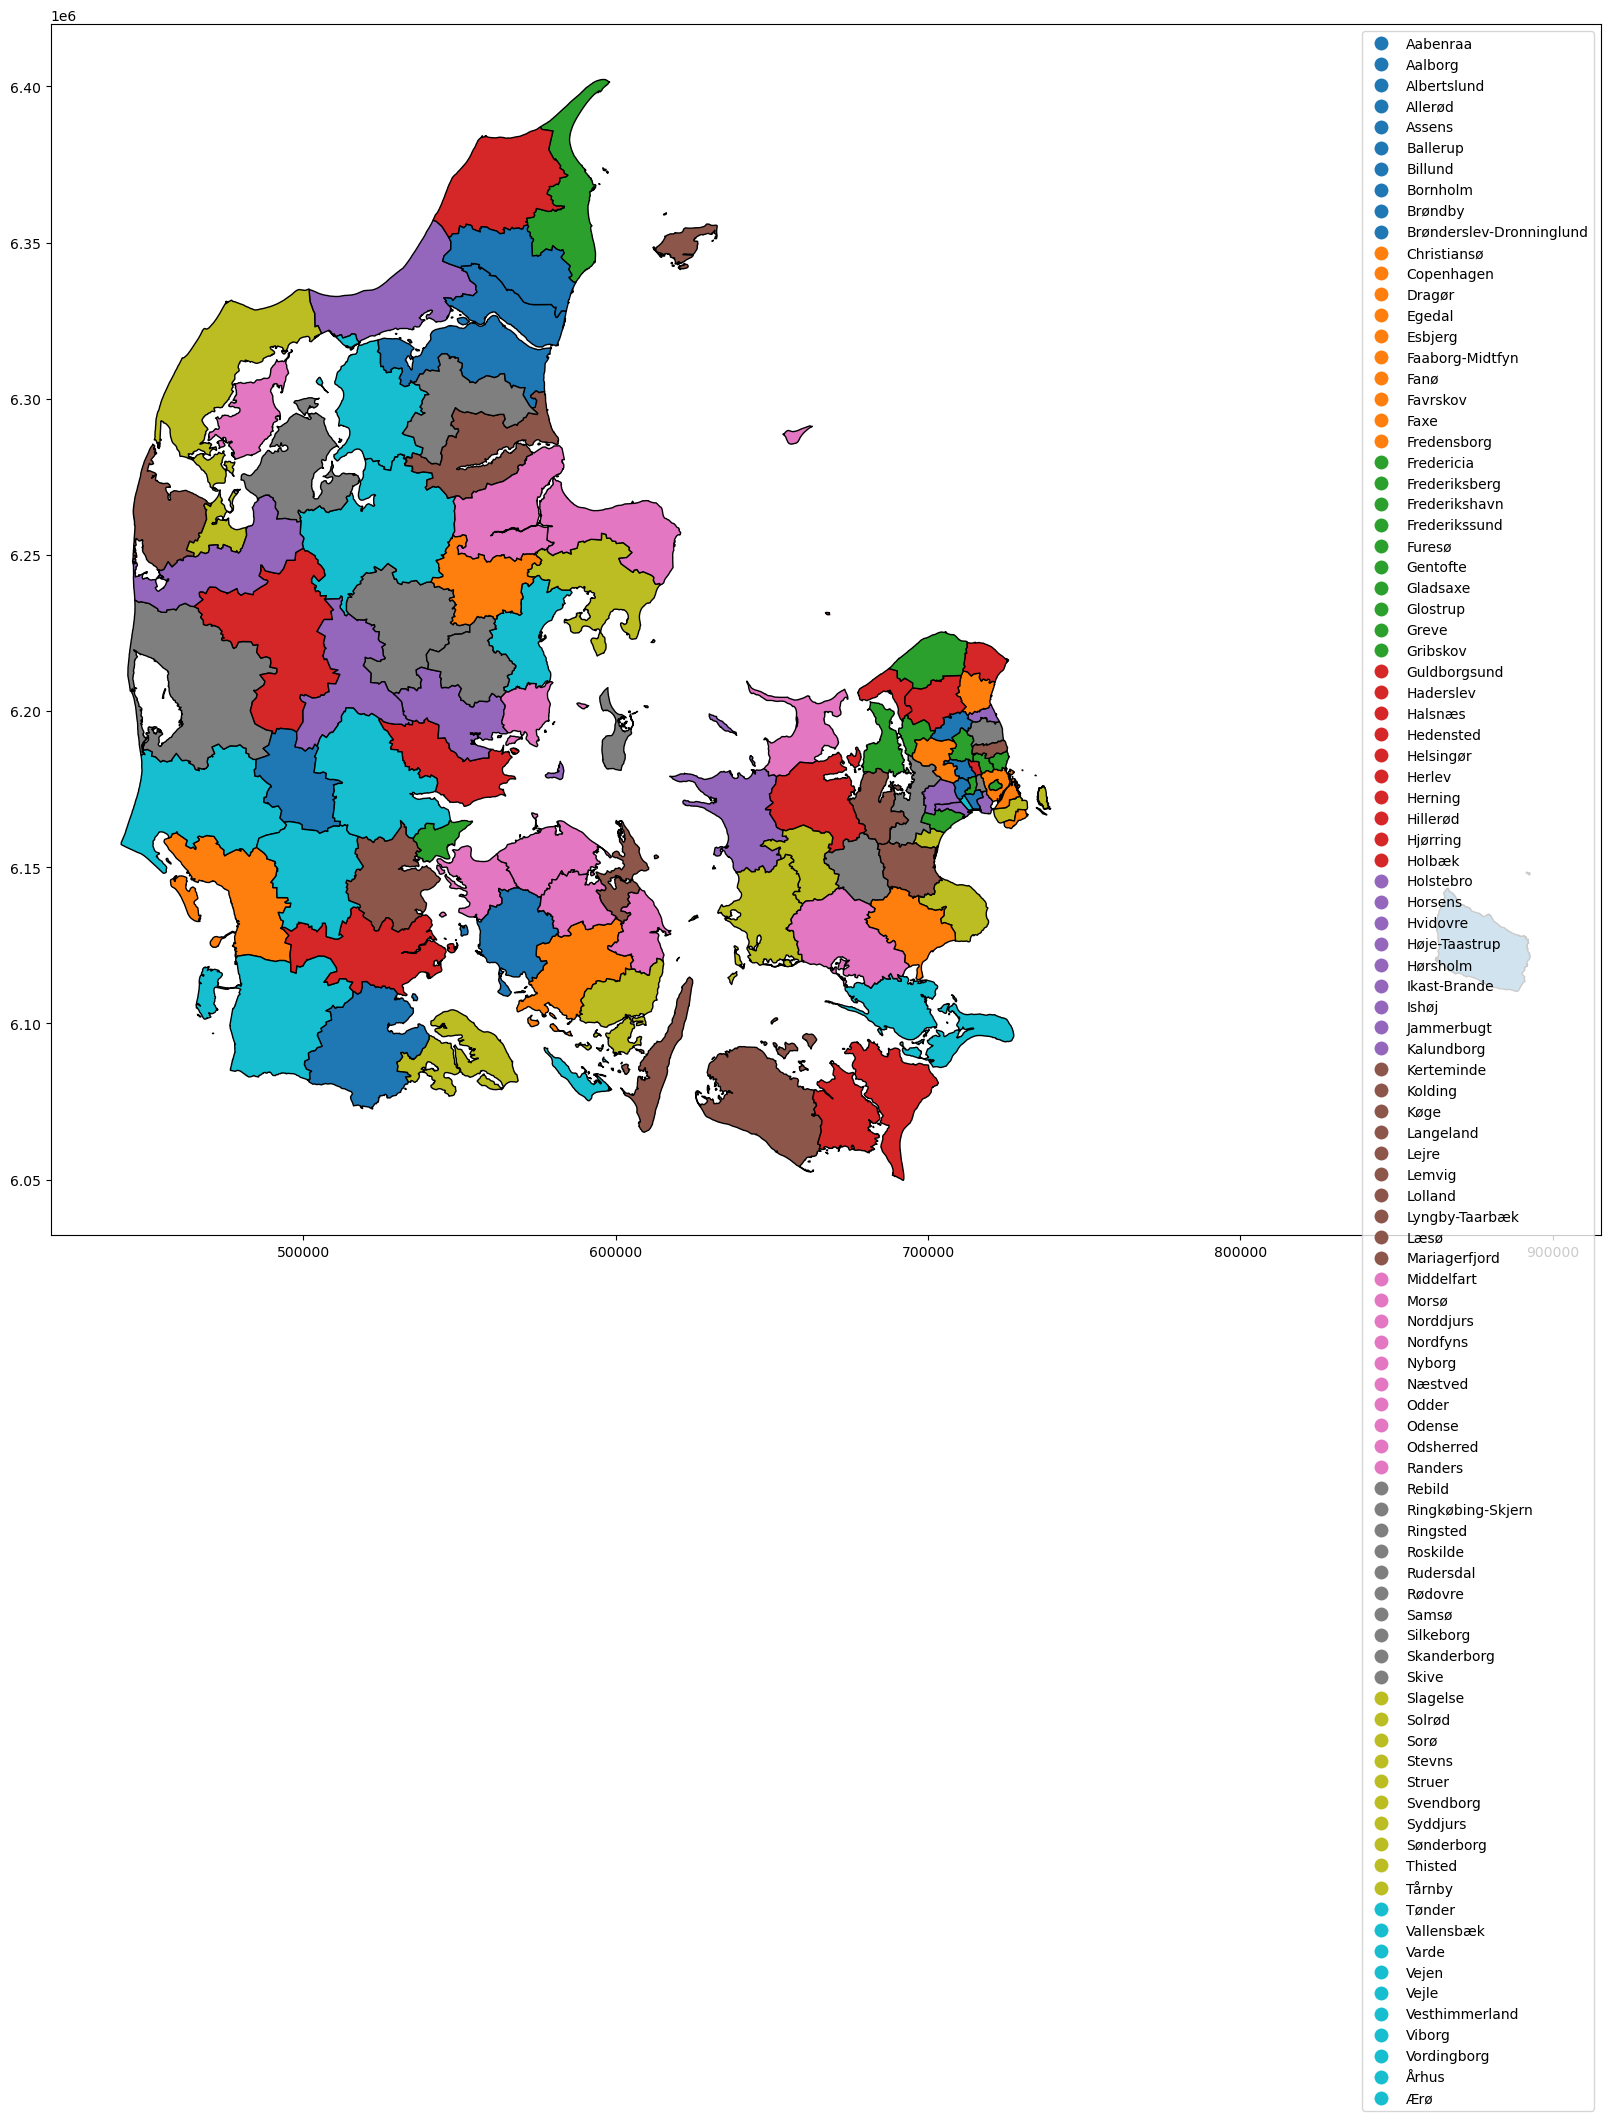

In [12]:
ax= dk_cities.plot(column='label_en', figsize=(20, 20), edgecolor='black', legend=True)